In [1]:
DATA_NAME = 'approx1e5-pastis-wavelet-gray' # size-name-transform-channel
sample_max = int(1e5)

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/pastis/wavelet/approx1e5/gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
data_dir = os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle')
group_data_map = pd.read_pickle(data_dir)
GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
full_params = pd.read_csv(Path(os.path.join(CWD, "CSVs", "optimized_params.csv")), index_col='layer')[["total_samples", "initial_r", "initial_eta", "kstest_stat_initial"]]
full_params["total_samples"] = full_params["total_samples"].astype(int)
full_params

,total_samples,initial_r,initial_eta,kstest_stat_initial
layer,,,,
2,3180,0.42,5.7,0.018069
3,12720,0.51,7.3,0.004615
4,50880,0.44,1.4,0.006270
5,203520,0.47,0.2,0.005236
6,814080,0.50,-0.6,0.007522
7,3256320,1.00,-0.9,0.011481
8,13025280,0.70,-1.3,0.028140


Running process with original bounds


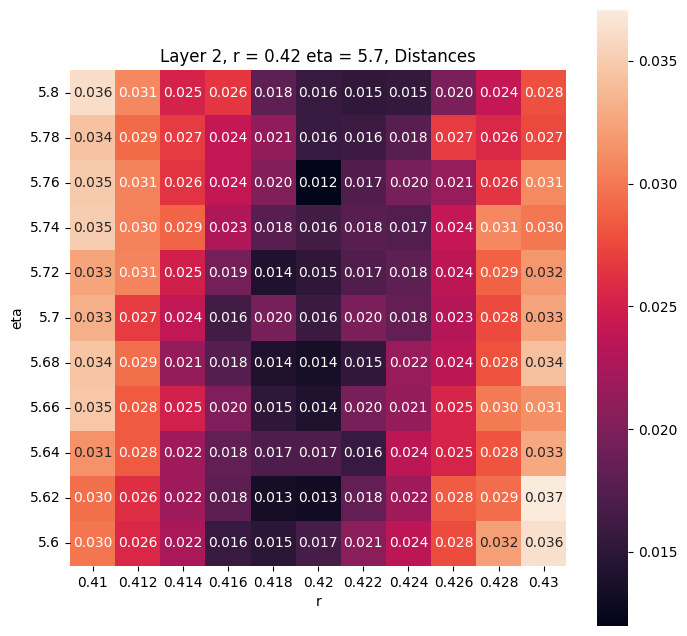

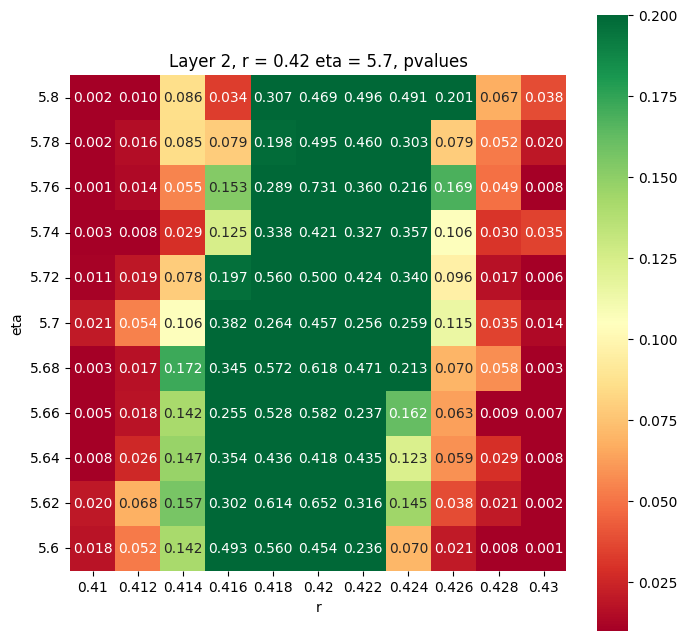

Only 65.28925619834712% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
100.0% of tests passed using r_bound = 0.005, eta_bound = 0.05. Showing Heatmaps


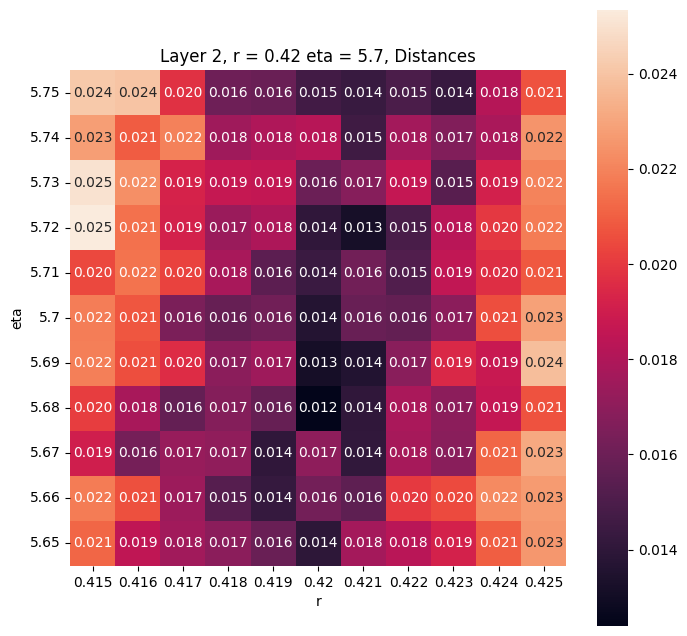

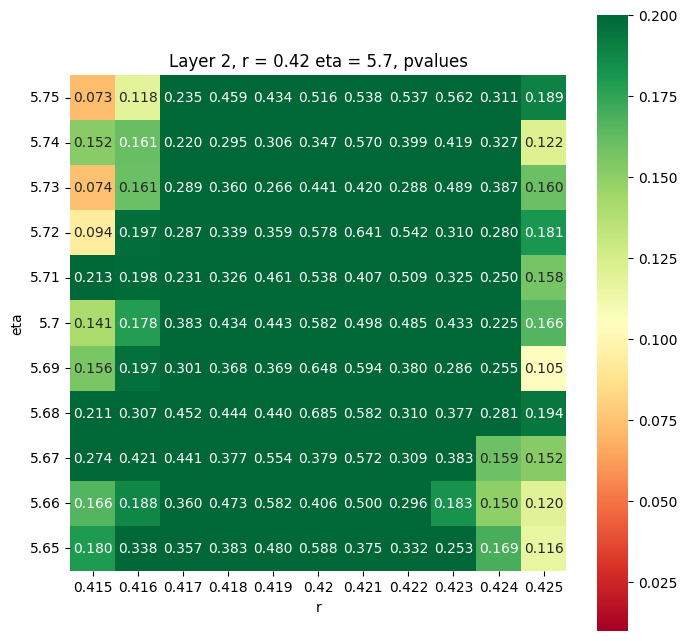

Running process with original bounds


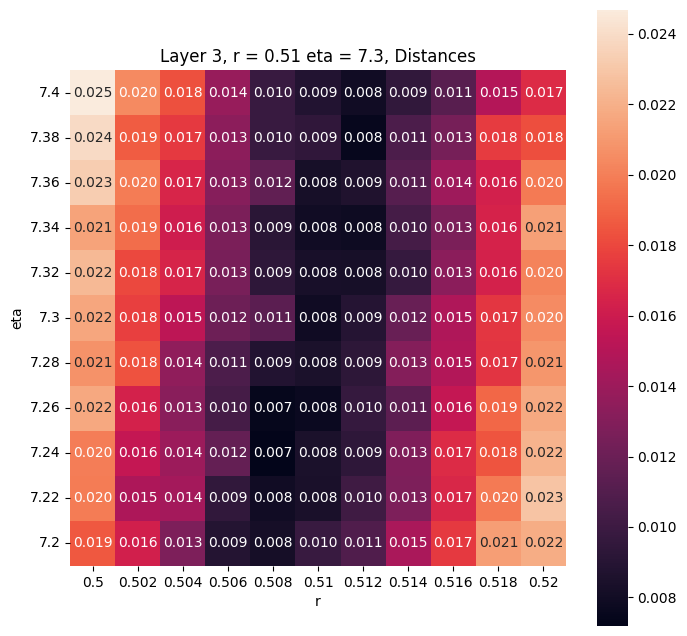

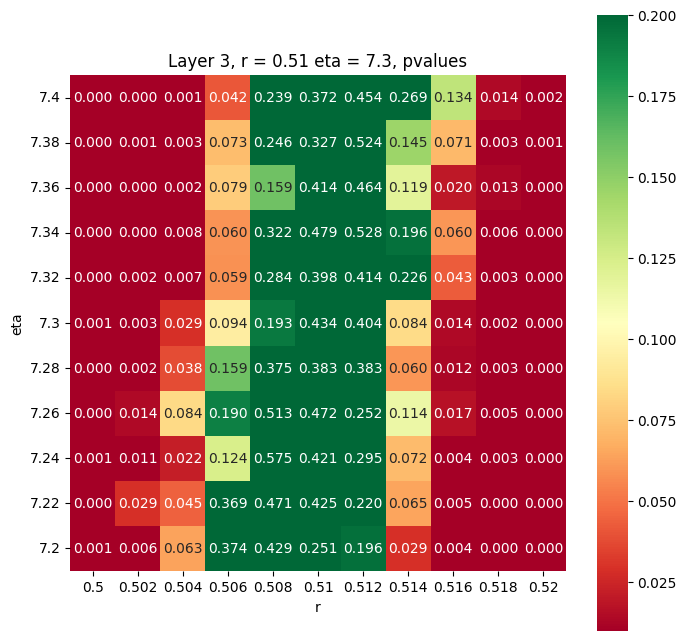

Only 47.93388429752066% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
89.25619834710744% of tests passed using r_bound = 0.005, eta_bound = 0.05. Showing Heatmaps


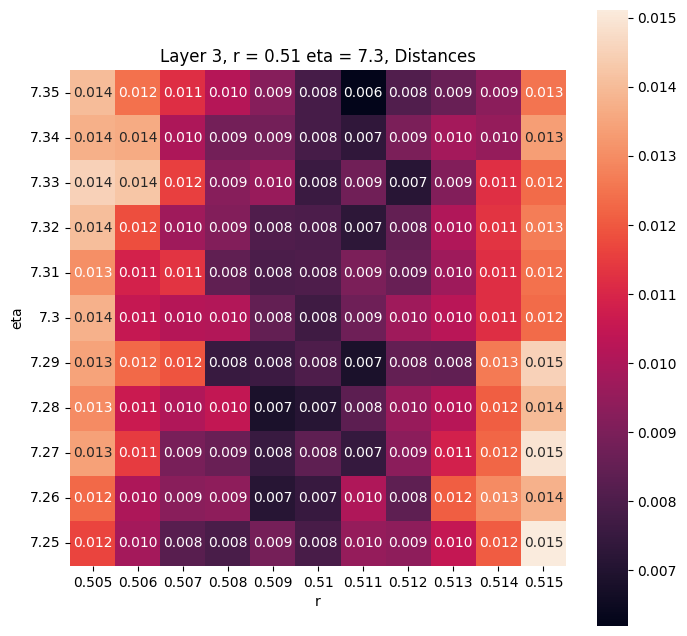

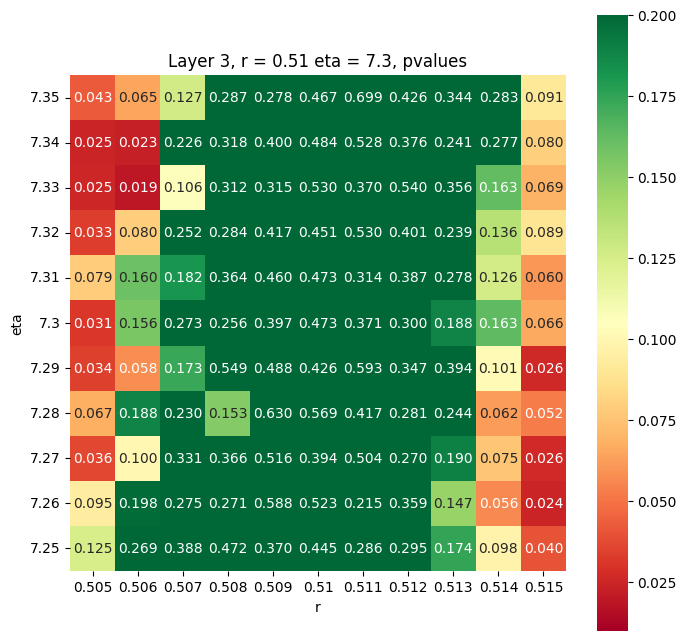

Running process with original bounds


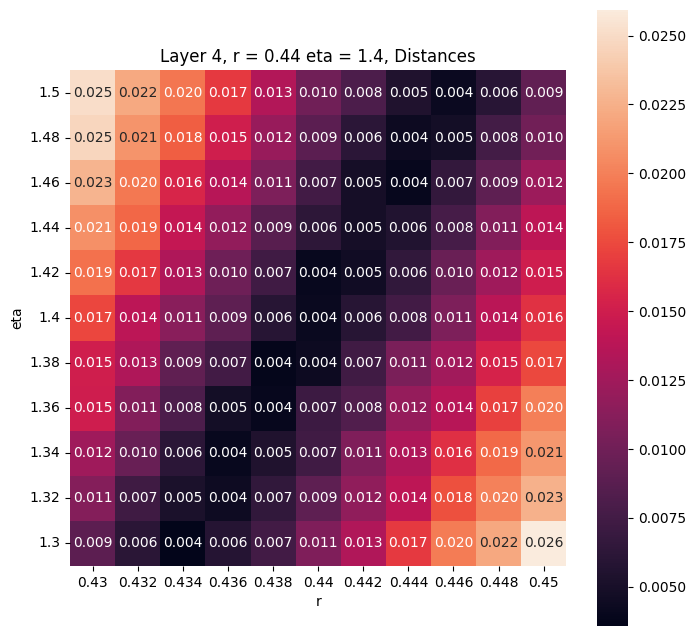

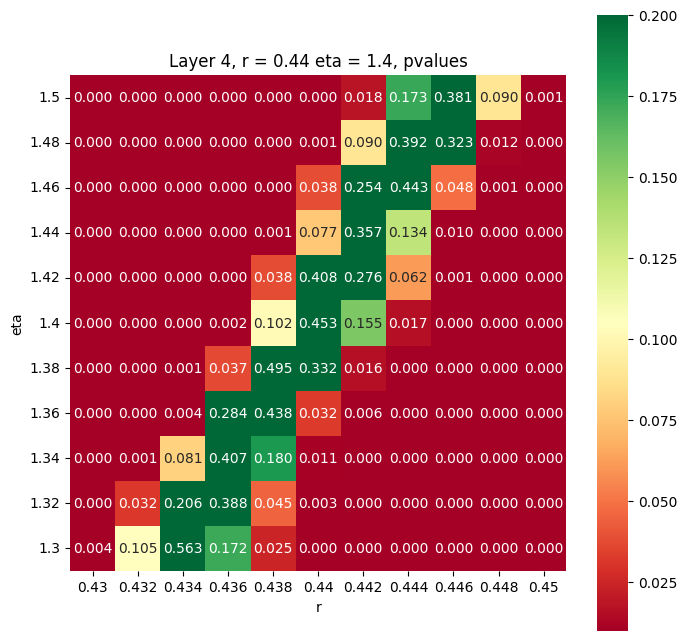

Only 23.96694214876033% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
Only 50.413223140495866% of tests passed using r_bound = 0.005, eta_bound = 0.05.Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
100.0% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


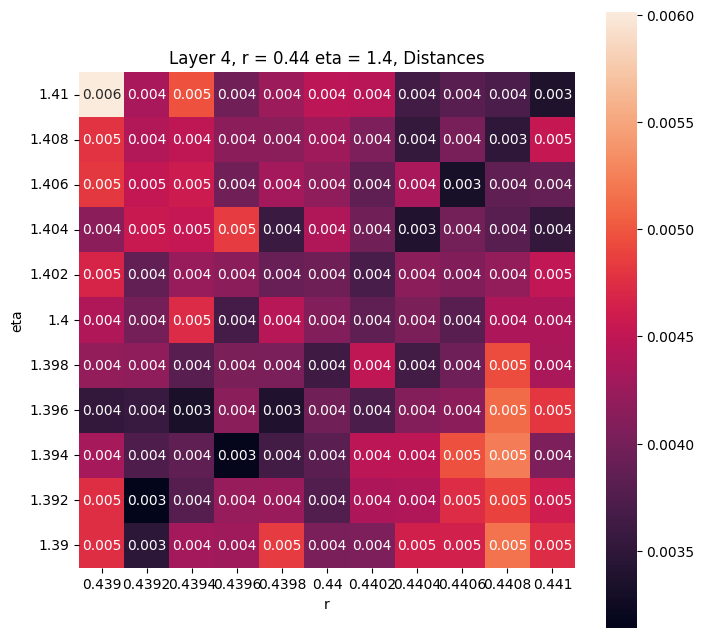

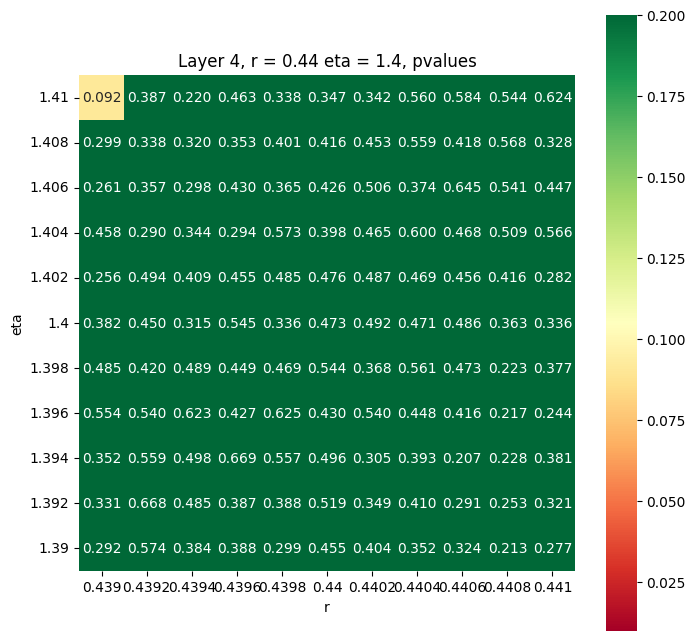

Running process with original bounds


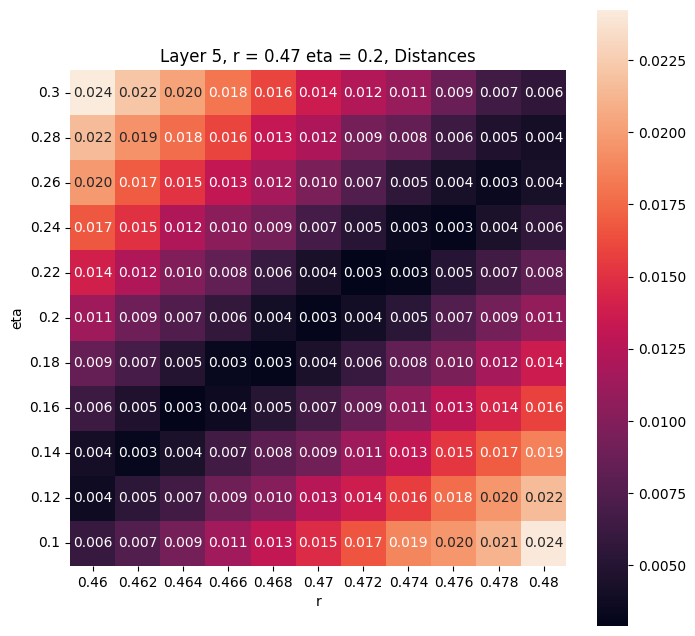

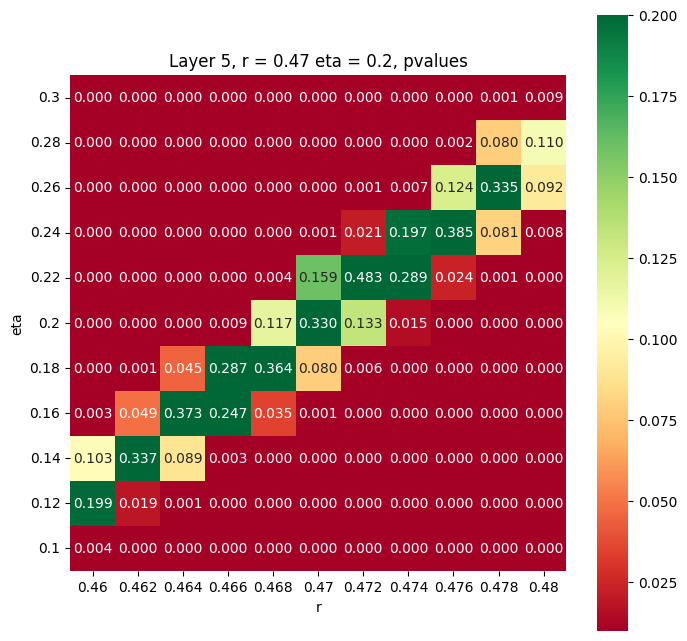

Only 19.00826446280992% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
Only 40.49586776859504% of tests passed using r_bound = 0.005, eta_bound = 0.05.Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
100.0% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


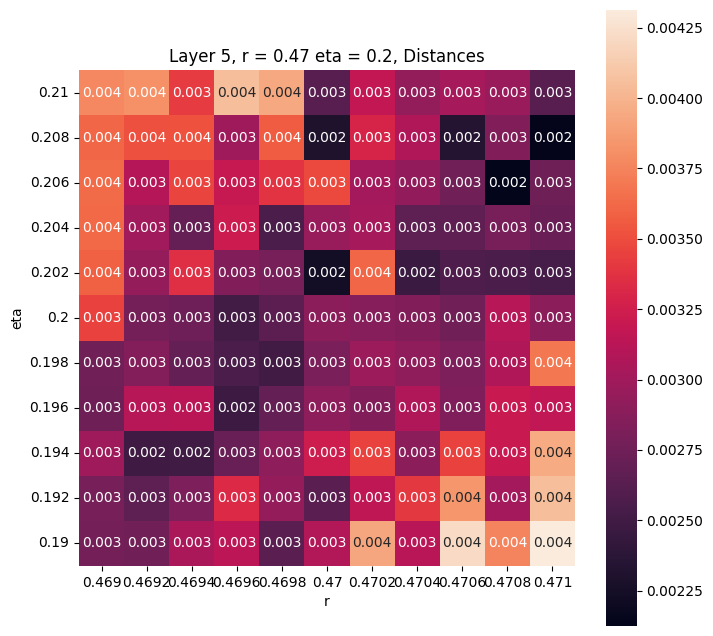

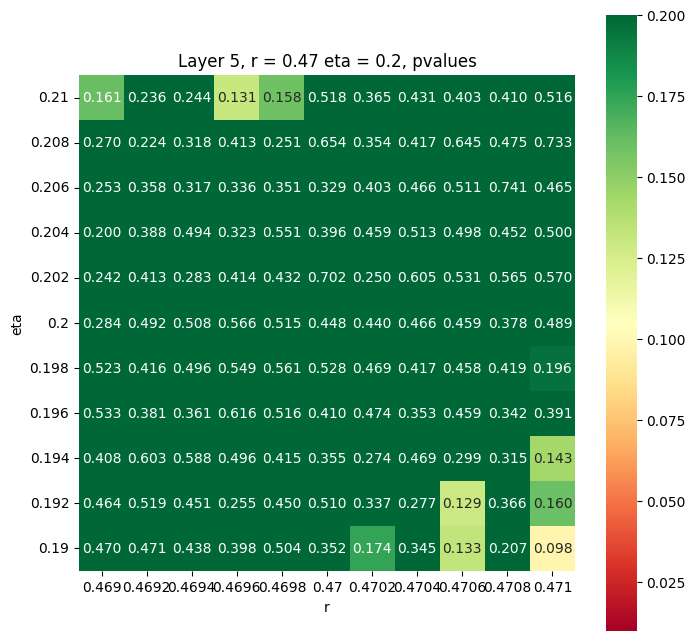

Running process with original bounds


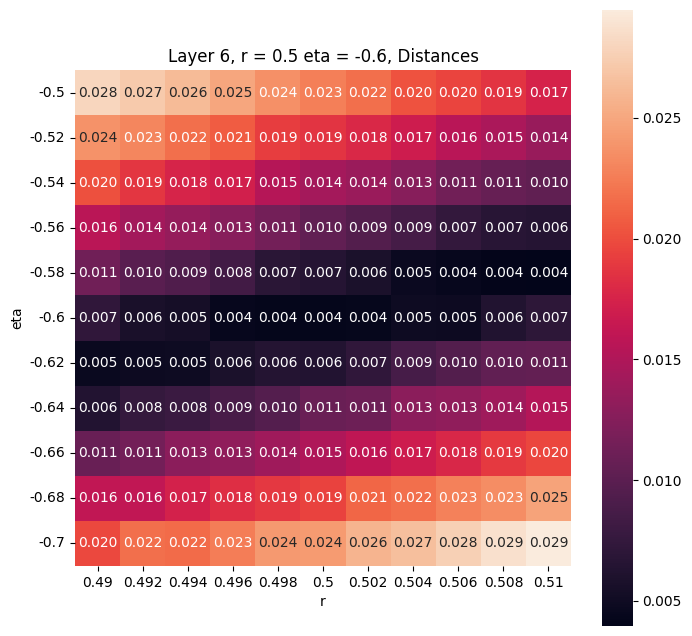

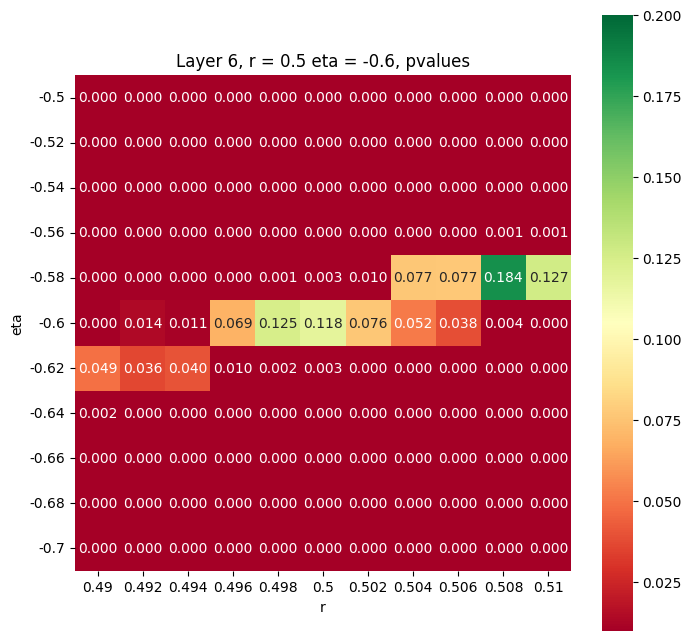

Only 7.43801652892562% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
Only 17.355371900826448% of tests passed using r_bound = 0.005, eta_bound = 0.05.Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
88.42975206611571% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


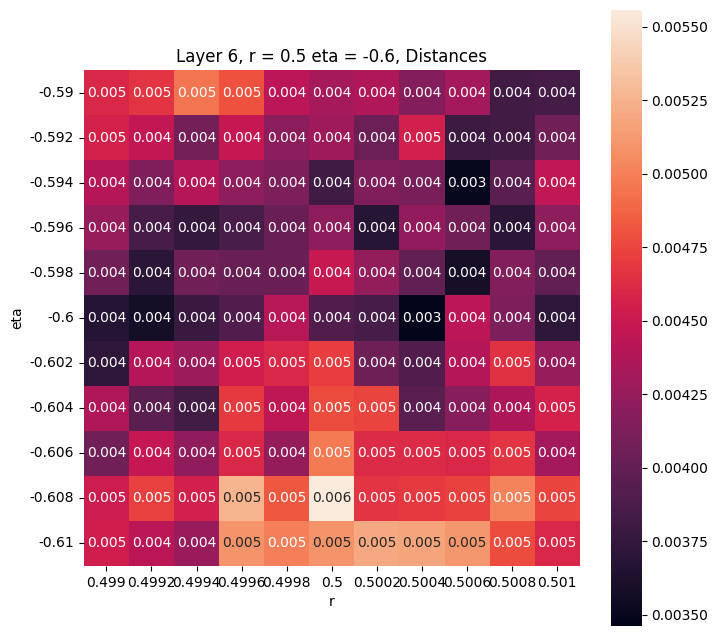

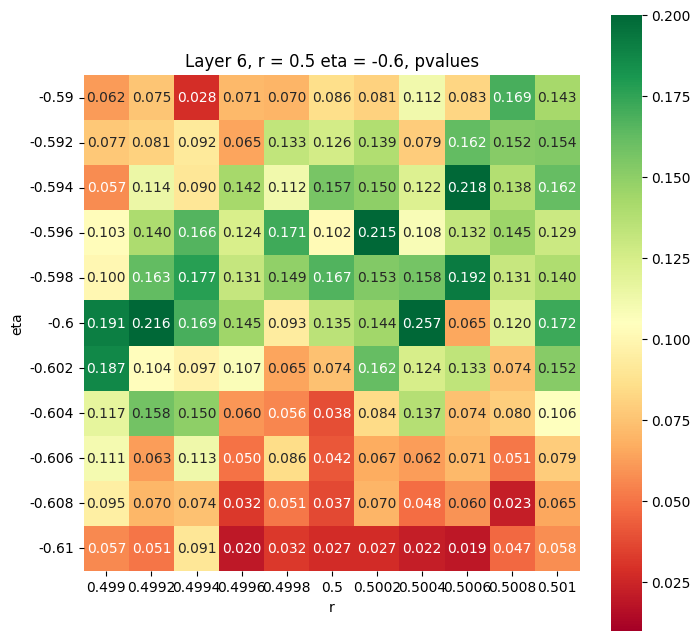

Running process with original bounds


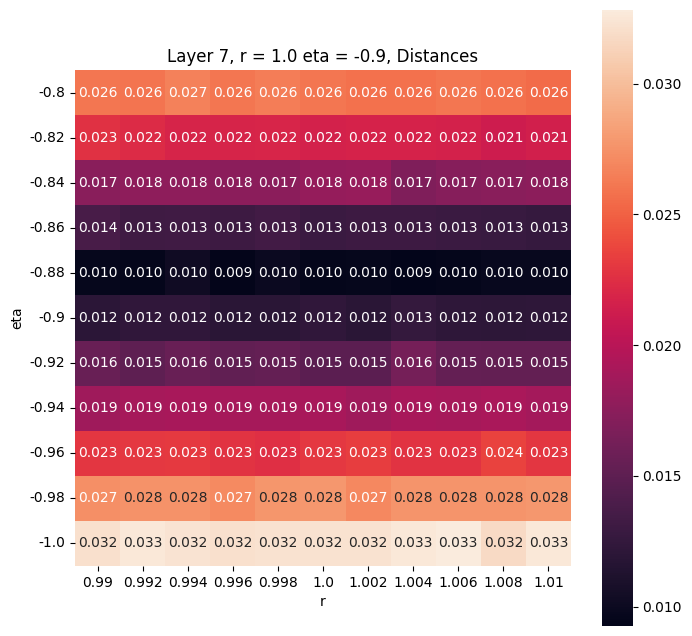

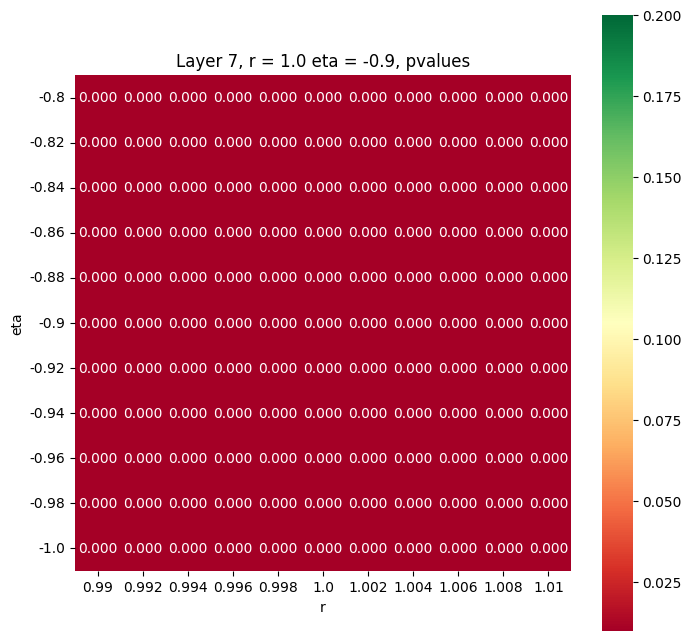

Only 0.0% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
Only 0.0% of tests passed using r_bound = 0.005, eta_bound = 0.05.Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 0.0% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds


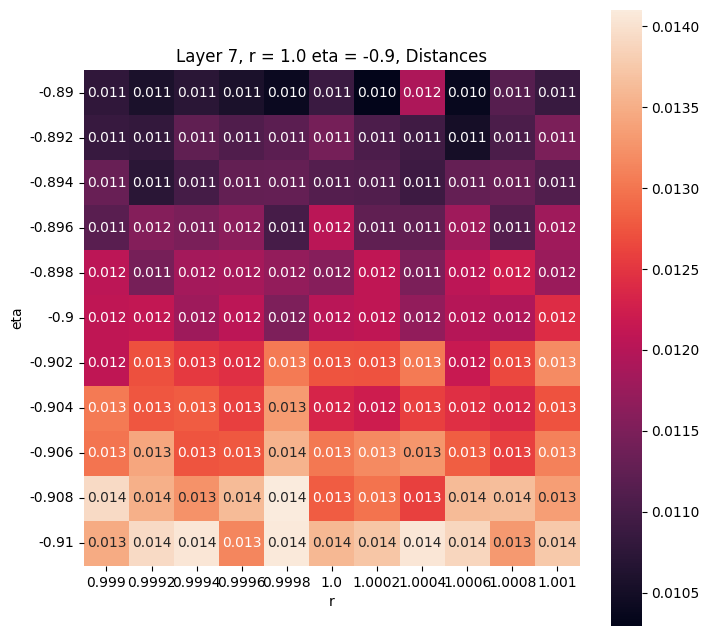

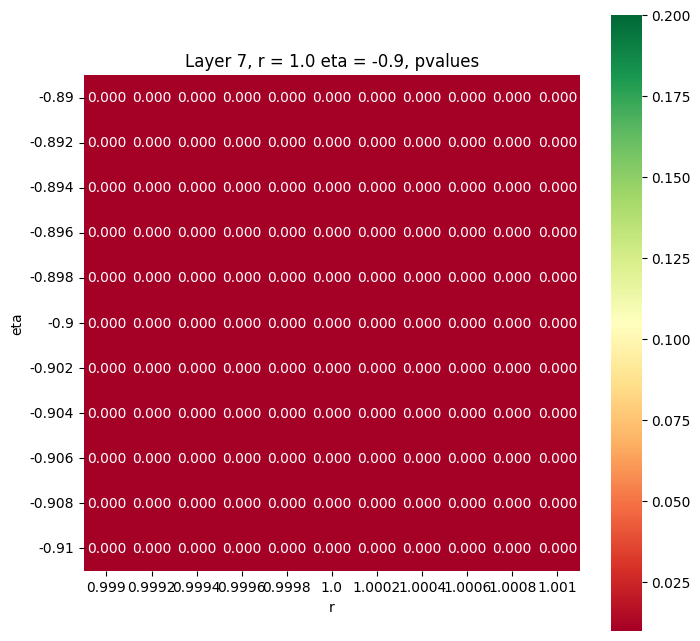

Running process with original bounds


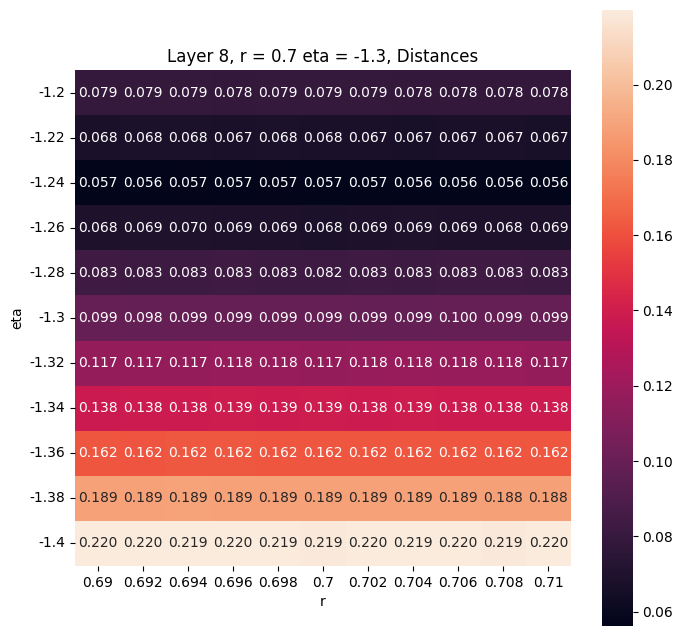

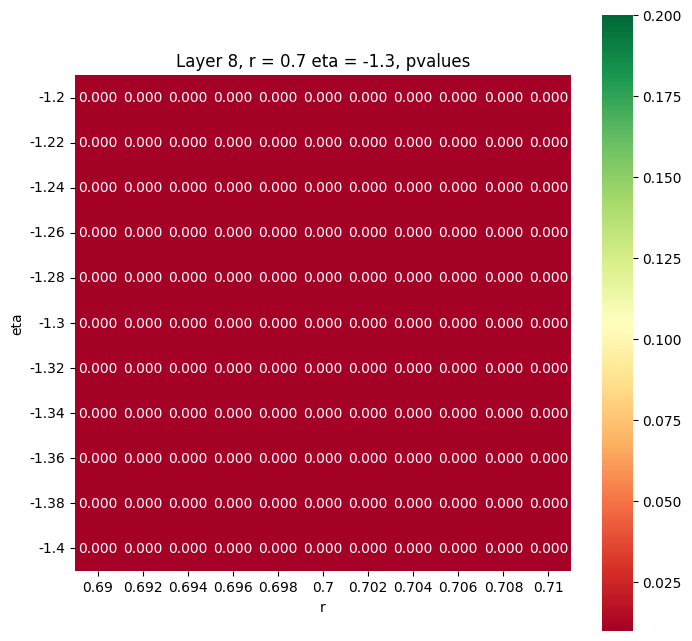

Only 0.0% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005
Only 0.0% of tests passed using r_bound = 0.005, eta_bound = 0.05.Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 0.0% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds


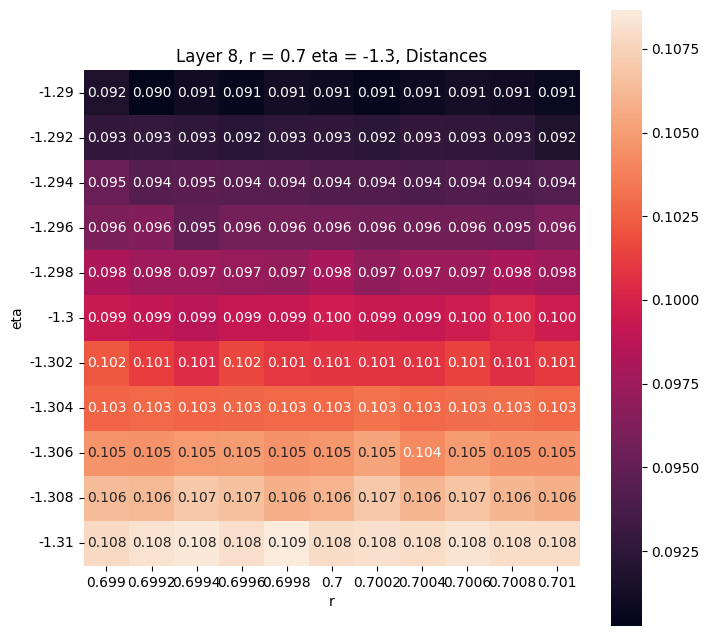

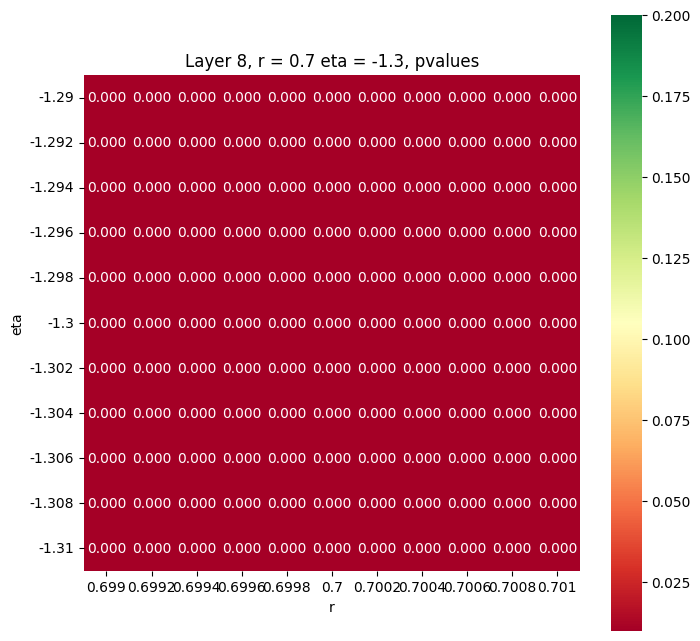

In [6]:
ks_output_df = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS:
    figs, output = KSHeatMapFullProcess(full_params.loc[group, 'initial_r'], full_params.loc[group, 'initial_eta'], min(full_params.loc[group, 'total_samples'], sample_max), iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 4, title = f"Layer {group}", return_vals = True, max_iterations = 2)
    ks_output_df.loc[len(ks_output_df)] = [group] + output


In [7]:
ks_output_df


,layer,inital_r_bound,inital_eta_bound,inital_pass_pct,final_r_bound,final_eta_bound,final_pass_pct
0,2.0,0.01,0.1,0.652893,0.005,0.05,1.000000
1,3.0,0.01,0.1,0.479339,0.005,0.05,0.892562
2,4.0,0.01,0.1,0.239669,0.001,0.01,1.000000
3,5.0,0.01,0.1,0.190083,0.001,0.01,1.000000
4,6.0,0.01,0.1,0.074380,0.001,0.01,0.884298
5,7.0,0.01,0.1,0.000000,0.001,0.01,0.000000
6,8.0,0.01,0.1,0.000000,0.001,0.01,0.000000
